# Plot basic classification event selecttion cuts

last edit Apr-4, 2023

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

In [3]:
figures_path = "/Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/EventSelection/"
import ROOT 

Welcome to JupyROOT 6.26/06


In [4]:
pd.options.display.precision = 1

# (1) Load data without applying acceptance matching cut

In [5]:
subdirname = "sidisdvcs_24Mar2023_commit_cfbc431" 
e_e_pi,_,_ = load_SIDIS_data( Nruns = 20,
                             rgb_runs_filenames = ["good_runs_10-2-final.txt"], # ,"good_runs_10-4.txt","good_runs_10-6.txt"], 
                             subdirname = subdirname,
                             do_e_e_pi_n=False, do_e_e_pi_FreeP=False, 
                             fdebug=0 );
Events,_,_,_ = apply_further_selection_cuts_to_data(doAcceptanceMatchingCut=False)

Done loading files.
Applying selection cuts not previously imposed
Apply a cut on the missing mass of a (e,e'π) reaction: 1.7<Mx<5.0 GeV/c2
(e,e π+ )
5806022 events after original cut (100.0 %)
5806021 events after p-theta cut (100.0 %)
4908273 events after Mx cut (84.5 %)
4898898 events after Kinematical cut (84.4 %)
(e,e π- )
2422592 events after original cut (100.0 %)
2422591 events after p-theta cut (100.0 %)
2033553 events after Mx cut (83.9 %)
2029527 events after Kinematical cut (83.8 %)
 
Done applying event-selection cuts


In [6]:
EventsWithAccMatch2D,_,_,_ = apply_further_selection_cuts_to_data()

Applying selection cuts not previously imposed
Apply a π+/π- acceptance matching cut on the in p-theta plane


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:1126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SI

Apply a cut on the missing mass of a (e,e'π) reaction: 1.7<Mx<5.0 GeV/c2
(e,e π+ )
5806022 events after original cut (100.0 %)
3946061 events after p-theta cut (68.0 %)
3183928 events after Mx cut (54.8 %)
3177875 events after Kinematical cut (54.7 %)
(e,e π- )
2422592 events after original cut (100.0 %)
2345776 events after p-theta cut (96.8 %)
1965814 events after Mx cut (81.1 %)
1961952 events after Kinematical cut (81.0 %)
 
Done applying event-selection cuts


# (2) $\pi^+$ and $\pi^-$ acceptance matching cut 

In [7]:
def shift_phi_for_sector_4(phi):#{
    phi_shifted = [];    
    for _phi_ in phi:    
        if _phi_ < 100: phi_shifted.append(_phi_+360)        
        else: phi_shifted.append(_phi_)
    phi = phi_shifted;
    return np.array(phi)
#}

In [8]:
phi_mid_arr = dict()
sectors     = [1,2,3,4,5,6]
phi_mid_arr = np.array([-1, 0, 60, 120, 180, -120, -60])
phi_min_arr = phi_mid_arr - 50
phi_max_arr = phi_mid_arr + 50

### (2.1) Plot $\theta$ vs. $p$ for the pion

In [9]:
p_min_arr = [1.25, 2.00, 2.50, 3.50 ]
p_max_arr = [2.00, 2.50, 3.50, 5.00 ]
Np = len(p_min_arr)

saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/EventSelection/theta_vs_p_sector_1.pdf
saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/EventSelection/theta_vs_p_sector_2.pdf
saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/EventSelection/theta_vs_p_sector_3.pdf
saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/EventSelection/theta_vs_p_sector_4.pdf
saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/EventSelection/theta_vs_p_sector_5.pdf
saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/EventSelection/theta_vs_p_sector_6.pdf


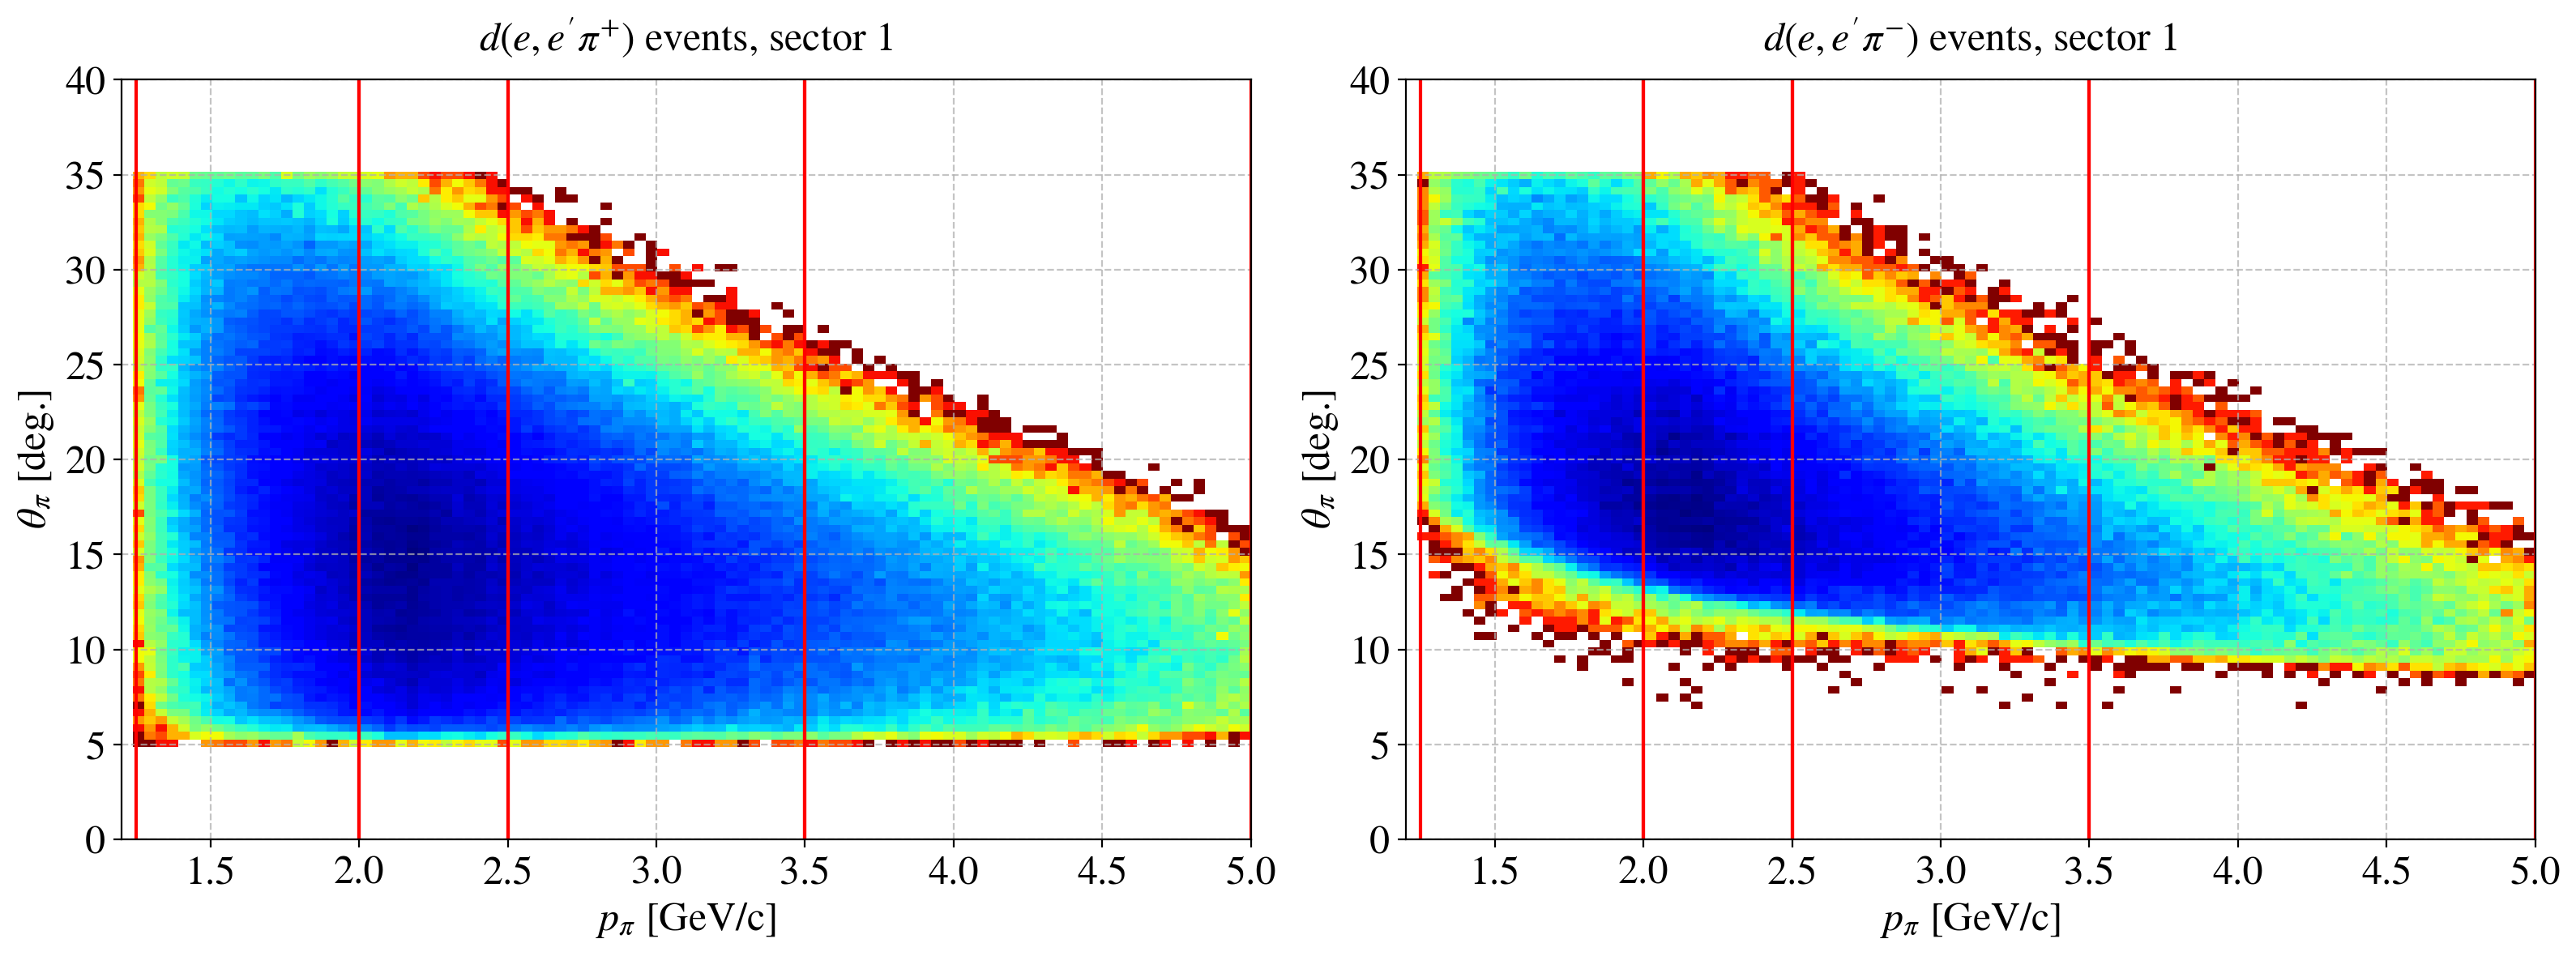

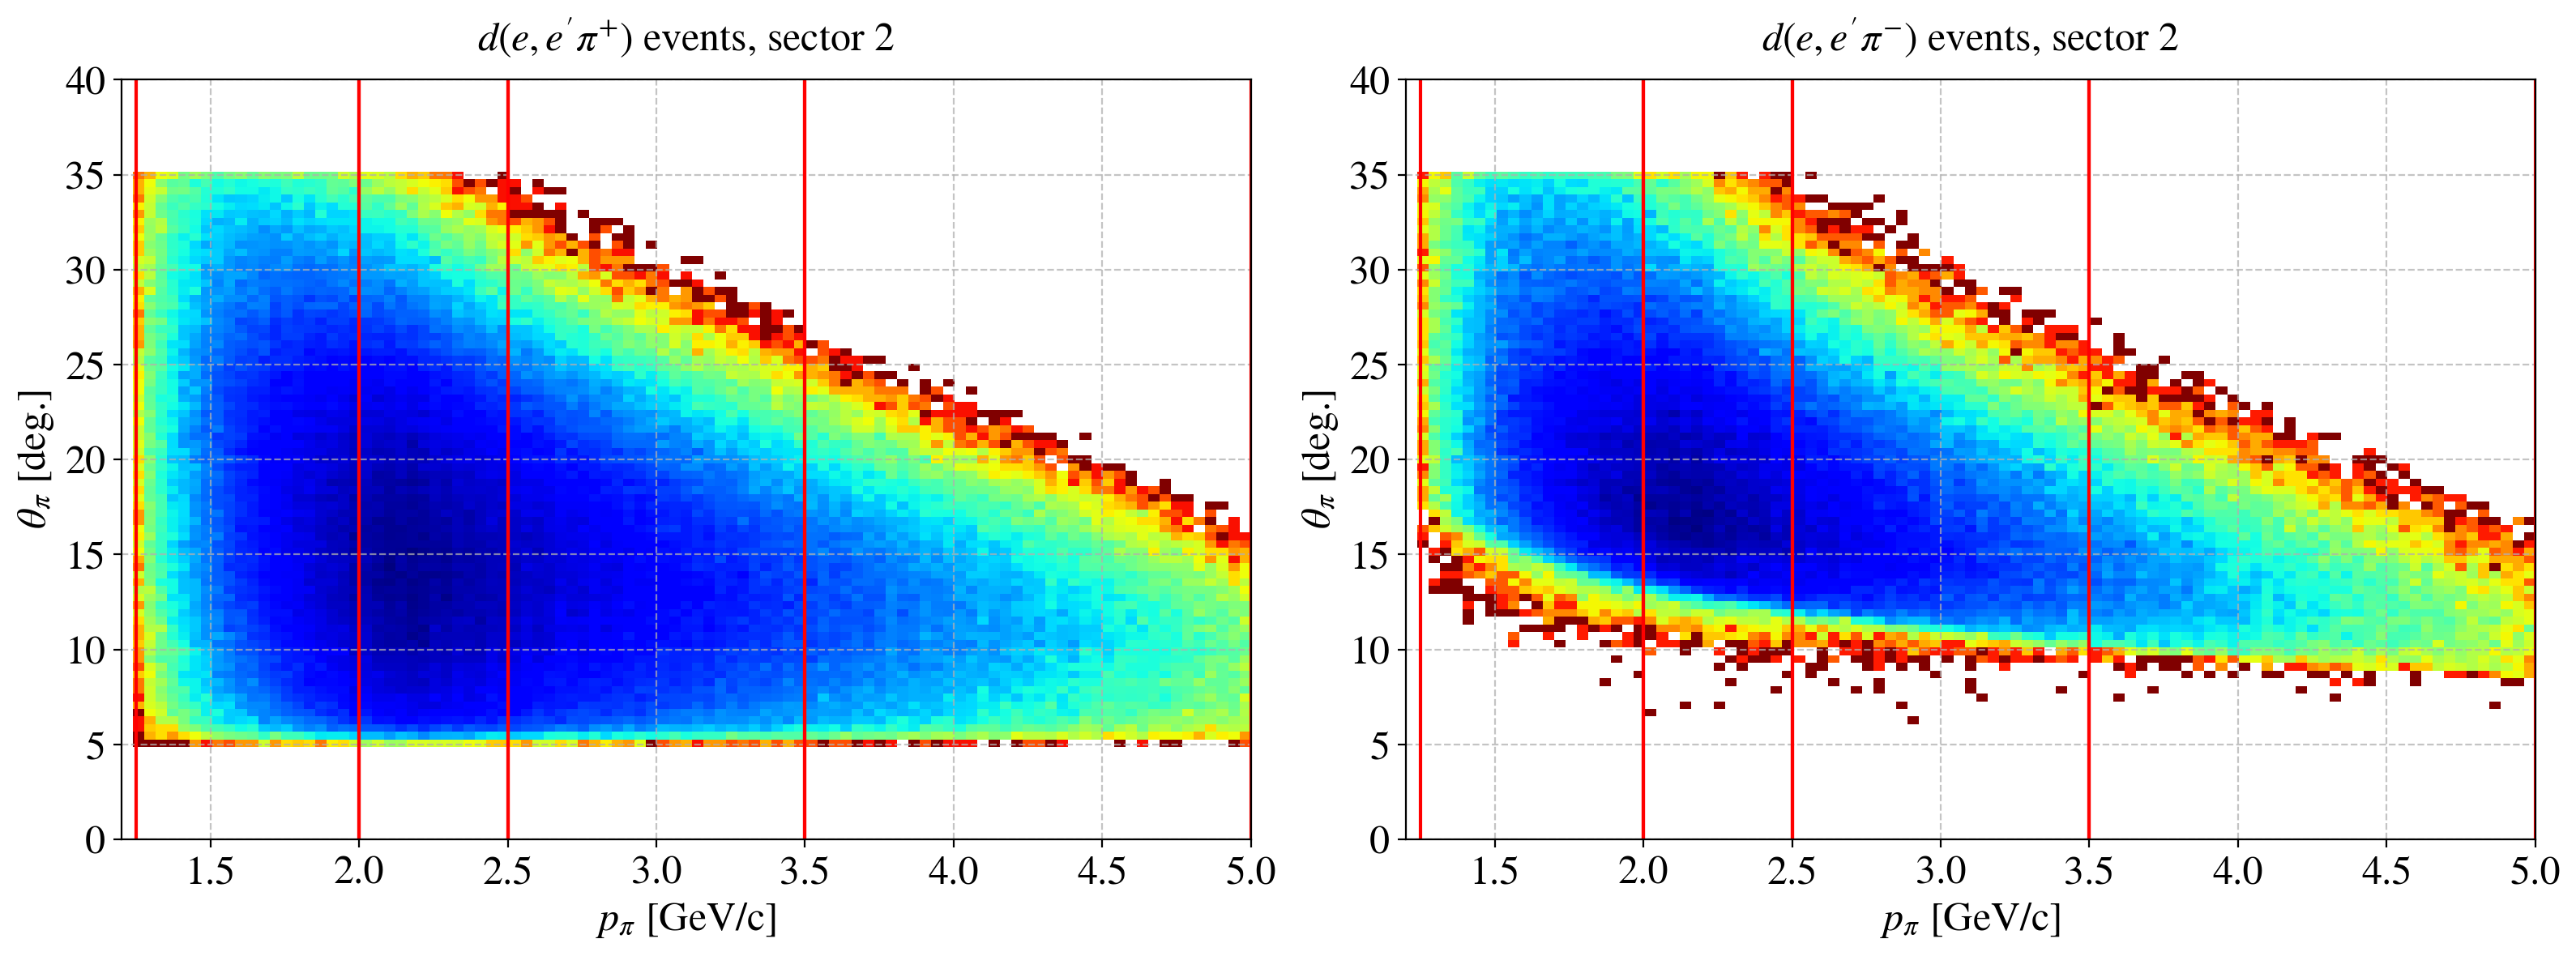

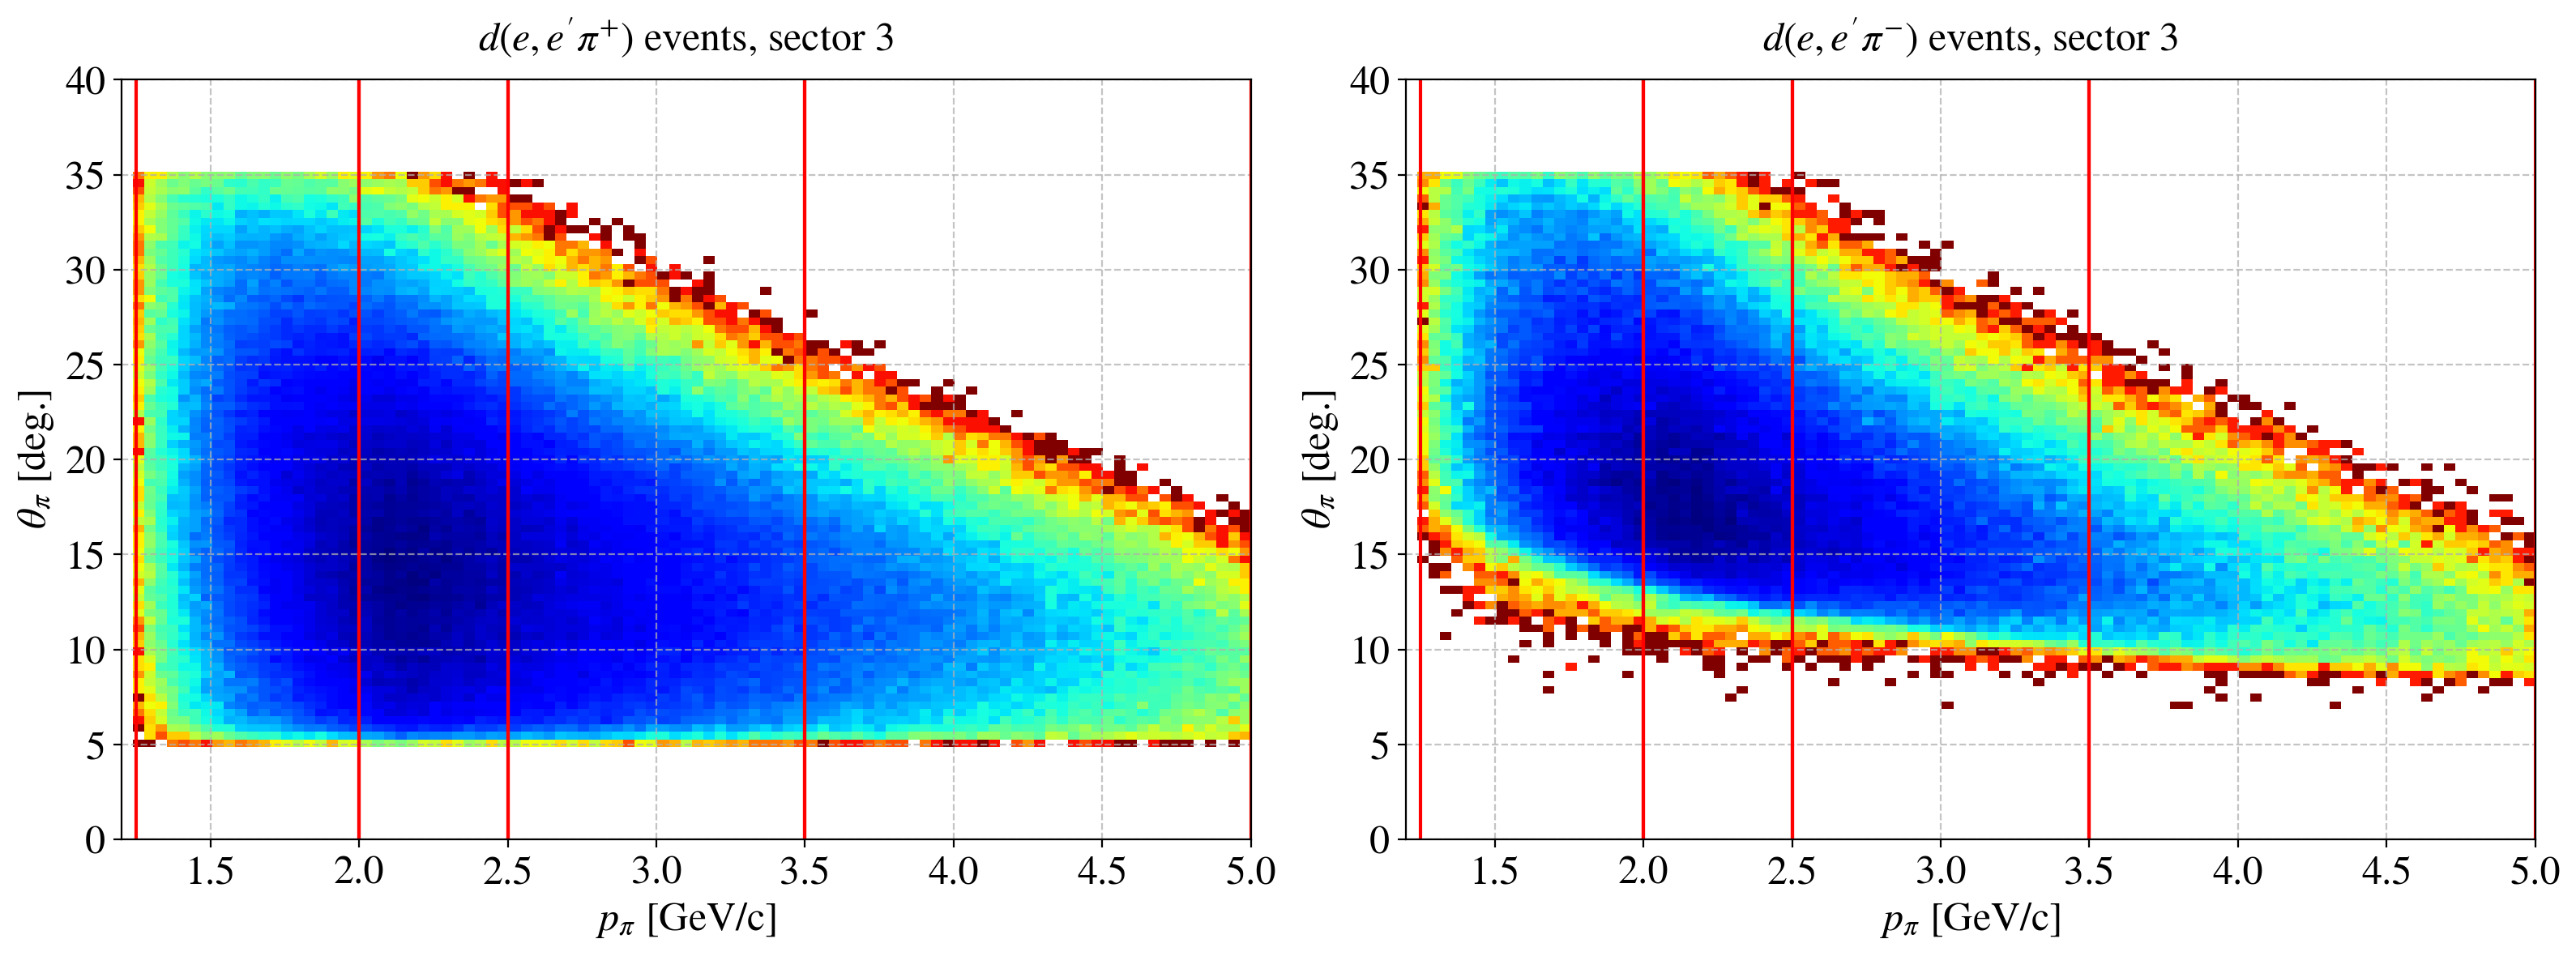

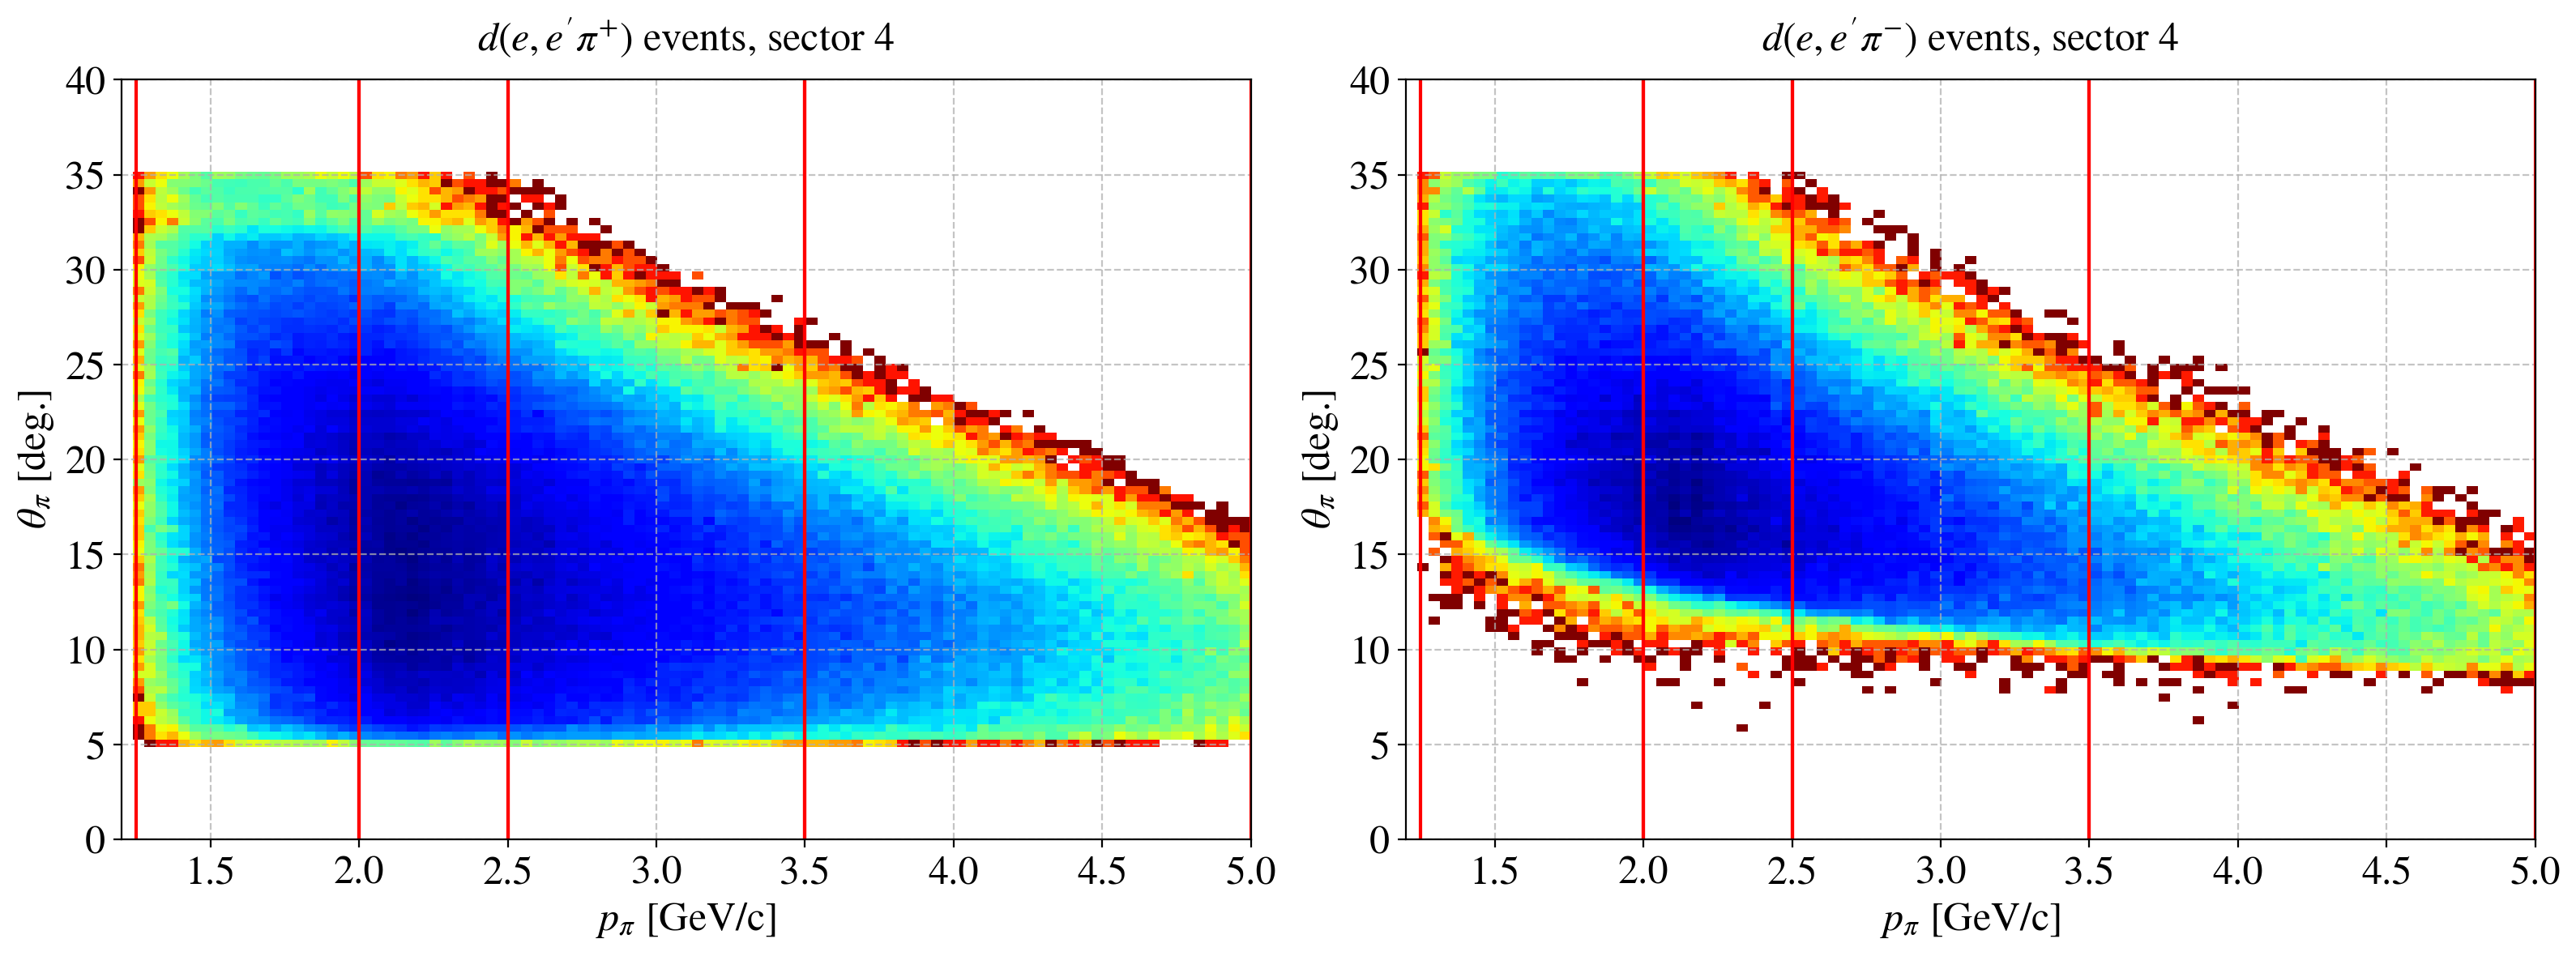

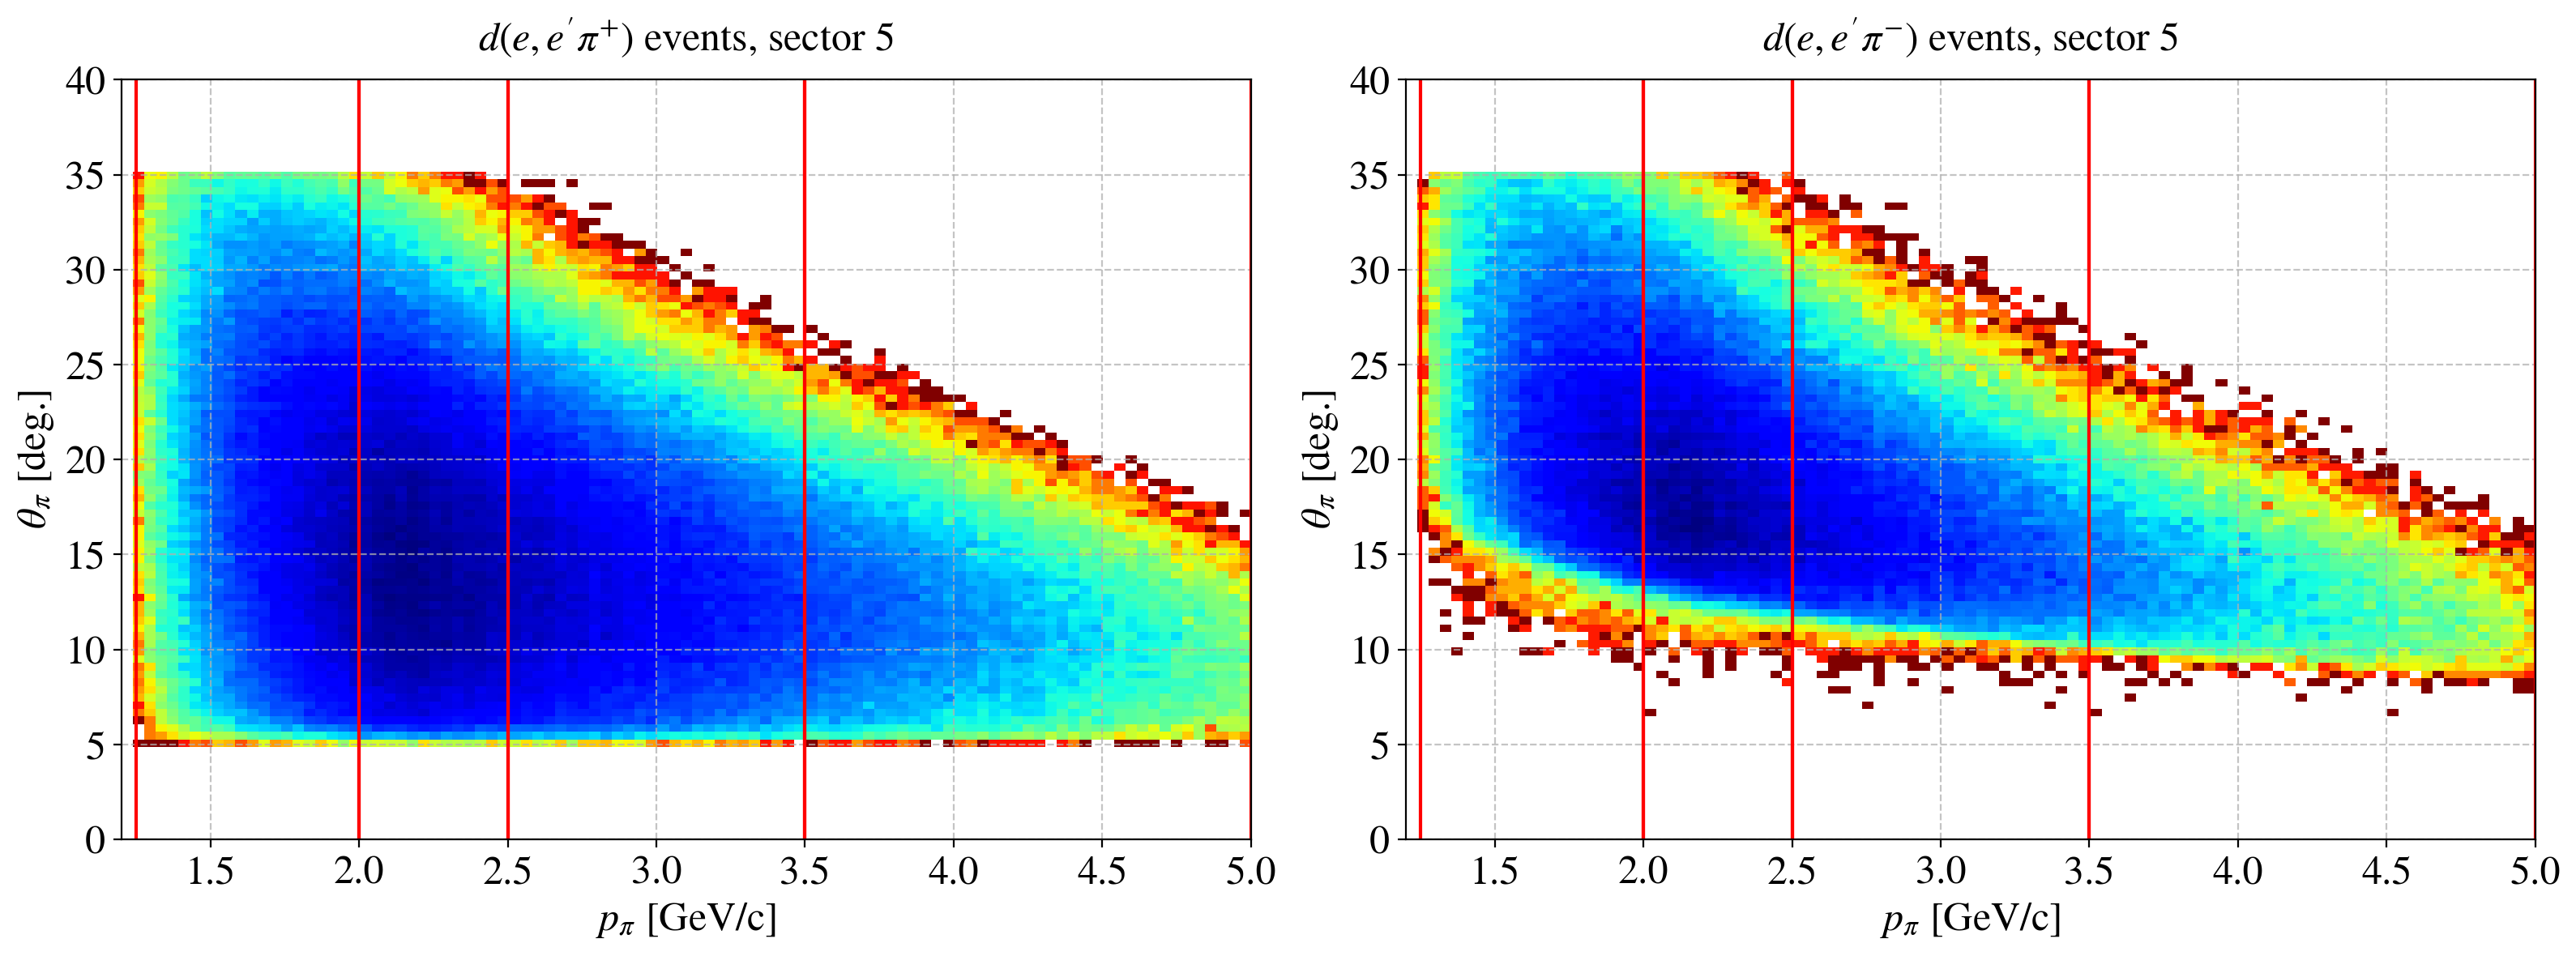

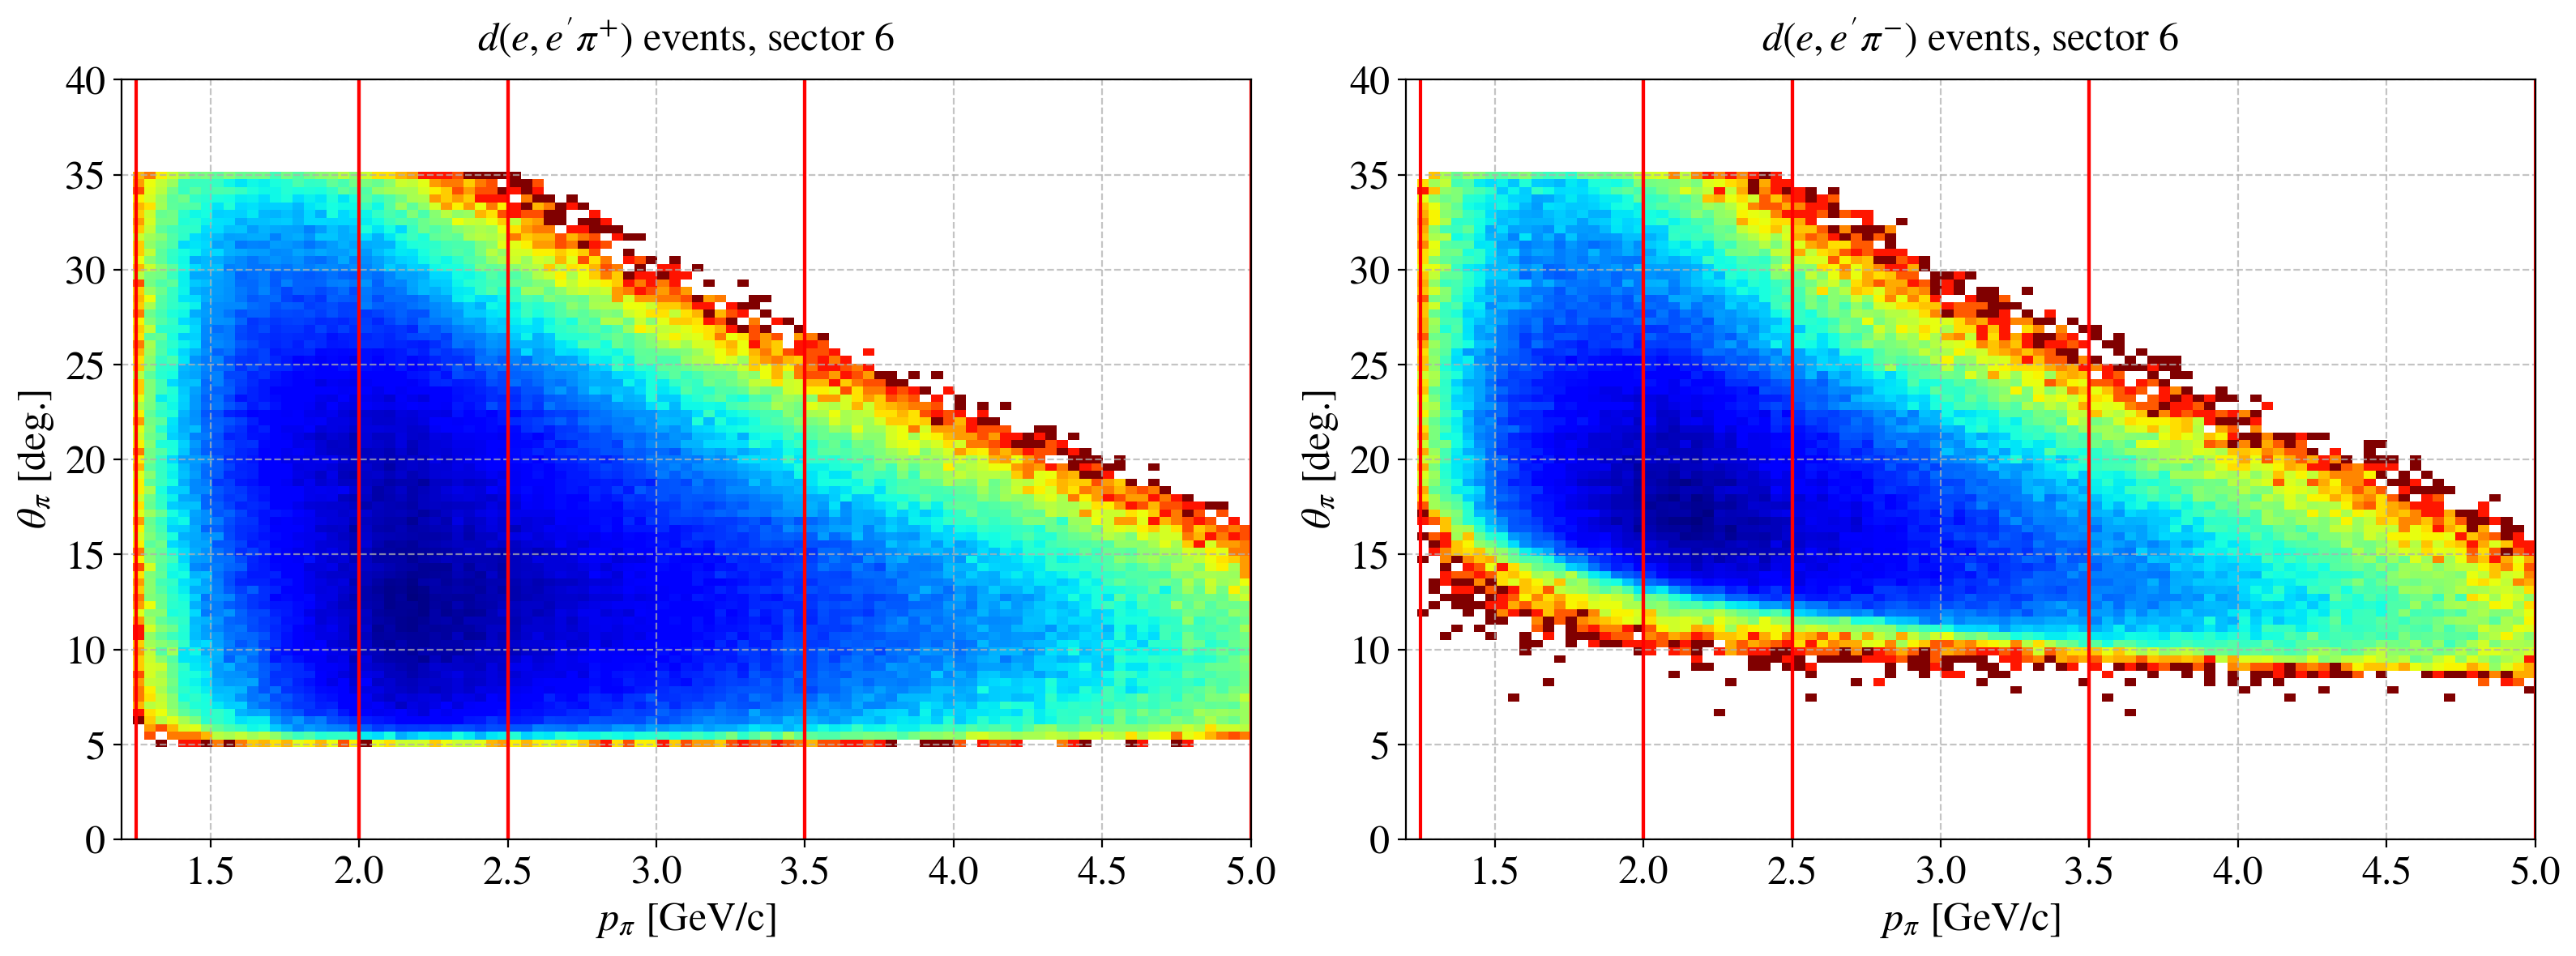

In [10]:

bins = (np.linspace(1.2,5,100),np.linspace(0,40,100))
for sector in sectors: 
    fig = plt.figure(figsize=(16,6),tight_layout=True)
    for pi_ch,pi_label,pi_idx in zip(pi_charge_names,pi_labels,[1,2]):
        df        = Events[pi_ch]
        p         = df.pi_P
        theta     = df.pi_Theta*180./np.pi
        pi_sector = df.pi_DC_sector
    
        ax = fig.add_subplot(1,2,pi_idx)
        plt.hist2d( p[pi_sector==sector], theta[pi_sector==sector], bins , cmap='jet_r', norm=LogNorm())

        for p_min,p_max in zip(p_min_arr,p_max_arr):
            plt.plot([p_min,p_min],[0,40],'-r',[p_max,p_max],[0,40],'-r')
    
        set_axes(ax,'$p_\pi$ [GeV/c]','$\\theta_\pi$ [deg.]',
             title="$d(e,e'"+pi_label+")$ events, sector %d"%sector,
             fontsize=18,do_add_grid=True)
    
    save_figure(filename = figures_path + 'theta_vs_p_sector_%d'%sector + '.pdf')    

### (2.2) Plot $\theta$ vs. $\phi$ for the pion for a specific bin in $p$

saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/EventSelection/theta_vs_phi_p_bins_sector_1.png


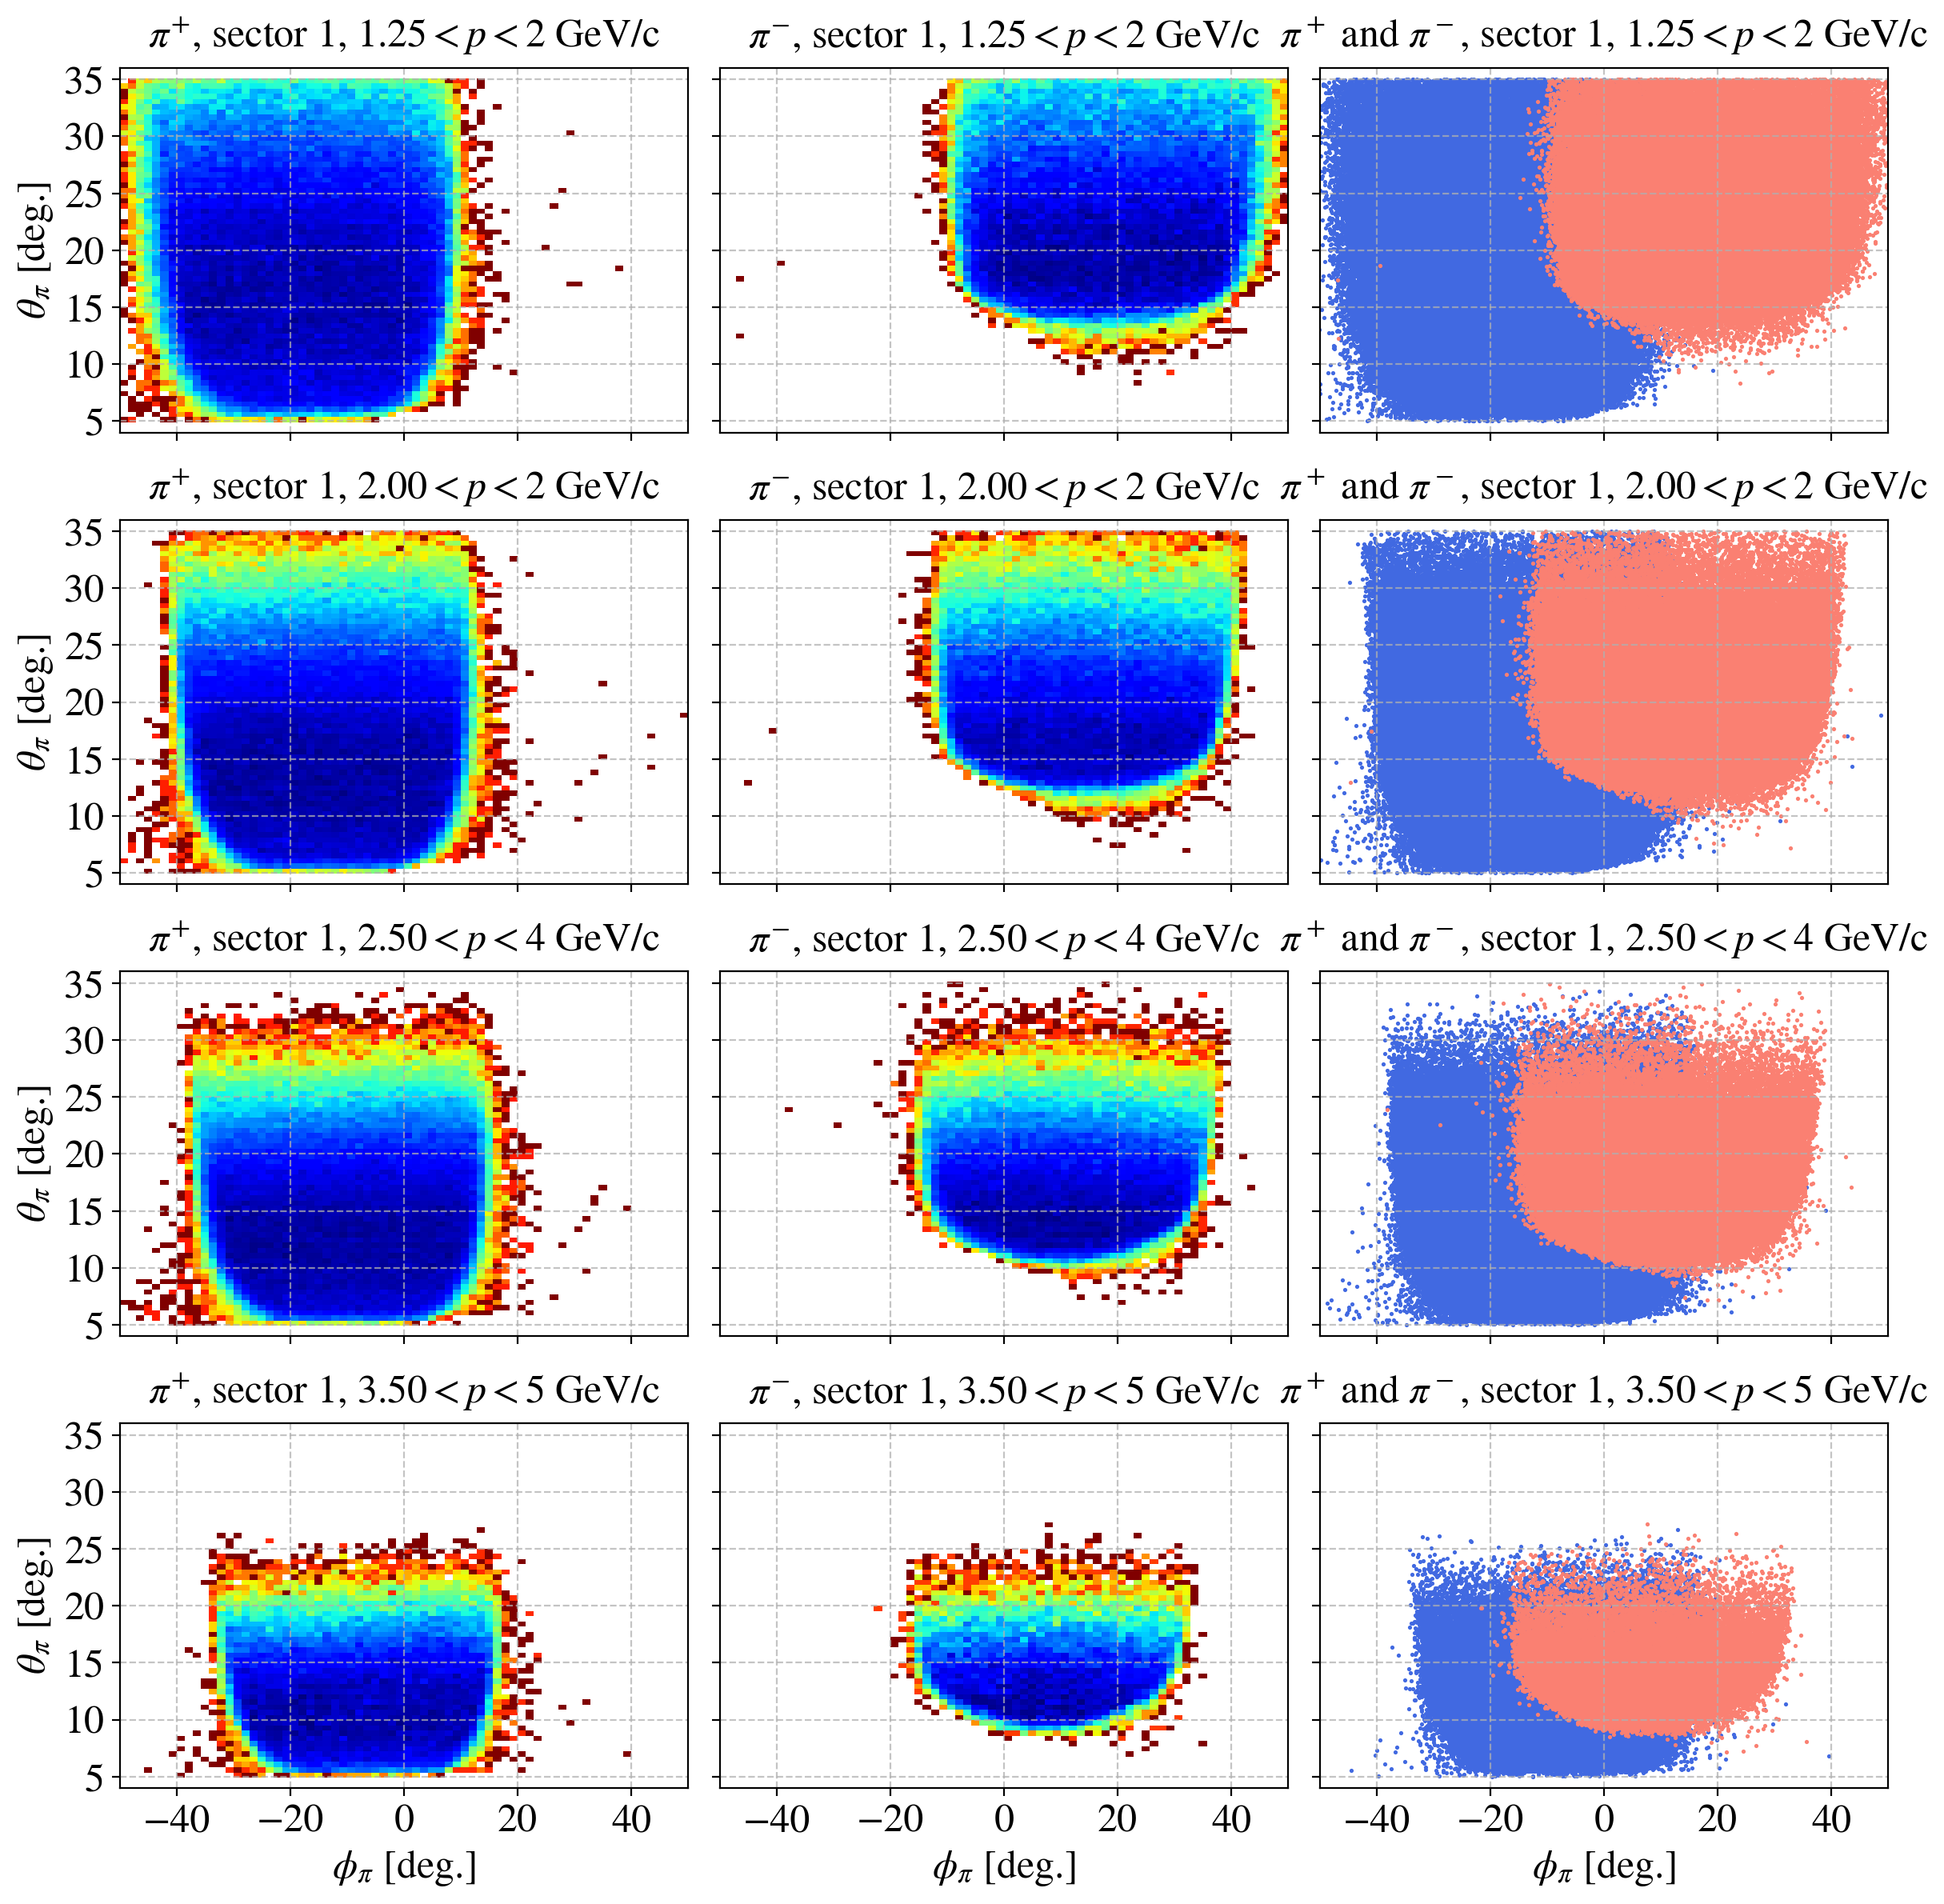

In [11]:
Nbins = 71
theta_bins = np.linspace(4,36,Nbins)
for sector in [sectors[0]]:
    axes = dict()
    fig = plt.figure(figsize=(12,12),tight_layout=True)
    phi_bins = np.linspace(phi_min_arr[sector],phi_max_arr[sector],Nbins)

    
    for p_min,p_max,p_idx in zip(p_min_arr,p_max_arr,range(Np)):
        axes[3*p_idx + 3] = fig.add_subplot(Np, 3, 3*p_idx + 3)

    
    for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):
        df = Events[pi_ch]
        df_in_sector = df[df.pi_DC_sector==sector]

        for p_min,p_max,p_idx in zip(p_min_arr,p_max_arr,range(Np)):
            # print(p_min,'< p(π) <',p_max)
            df_in_bin = df_in_sector[ (p_min < df_in_sector.pi_P) & (df_in_sector.pi_P < p_max) ]
            theta     = df_in_bin.pi_Theta*180./np.pi            
            phi       = df_in_bin.pi_Phi  *180./np.pi
            if sector==4: phi = shift_phi_for_sector_4(phi) 

            ax = fig.add_subplot(Np, 3, 3*p_idx + pi_idx)
            plt.hist2d( phi, theta, bins=(phi_bins,theta_bins) , cmap='jet_r', norm=LogNorm())

            set_axes(ax,
                     '$\phi_\pi$ [deg.]' if p_idx==Np-1 else '',
                     '$\\theta_\pi$ [deg.]' if pi_idx==1 else '',
                     remove_ticks_x=False if p_idx==Np-1 else True,
                     remove_ticks_y=False if pi_idx==1 else True,
                     title="$"+pi_label+"$, sector %d, $%.2f < p < %2.f$ GeV/c"%(sector,p_min,p_max),
                     fontsize=18,do_add_grid=True)

            axes[3*p_idx + 3].scatter( phi, theta,s=3 ,marker='.', color=pi_color, label="$"+pi_label+"$")
            
            
            
    for p_min,p_max,p_idx in zip(p_min_arr,p_max_arr,range(Np)):
        set_axes(axes[3*p_idx + 3],
                 '$\phi_\pi$ [deg.]' if p_idx==Np-1 else '','',                 
                 remove_ticks_x=False if p_idx==Np-1 else True,
                 xlim=(np.min(phi_bins),np.max(phi_bins)),ylim=(np.min(theta_bins),np.max(theta_bins)),
                 remove_ticks_y=True,                 
                 title="$\pi^+$ and $\pi^-$, sector %d, $%.2f < p < %2.f$ GeV/c"%(sector,p_min,p_max),                 
                 fontsize=18,do_add_grid=True)
    save_figure(filename = figures_path + 'theta_vs_phi_p_bins_sector_%d'%sector + '.png')

### (2.3) Match $\theta$ and $\Delta \phi$ for pions

In [12]:
def bowl_function( x, y0=0, Scale=1, x0=0, width=1, ymax=35, bowl_type='x2/(1-x2)' ):
    '''
    input:
    ----------
    ymax        maximal theta is 35
    
    bowl_type
                'x2/(1-x2)'
                 y = y0 + Scale * ( (x-x0)^2/(width-(x-x0)^2) ) 
                
                'parabola'
                y = y0 + Scale * (x-x0)^2
                
    '''
    # 
    if bowl_type == 'x2/(1-x2)':
        y = y0 + Scale*(np.square(x - x0)/(width-np.square(x - x0)))
        y[width<=np.square(x - x0)] = ymax 
        y[ymax < y] = ymax
        
    
    elif bowl_type == 'parabola':
        # smiling parabola
        y = y0 + Scale*(np.square(x-x0))

    return y
    

In [13]:
def get_bowl_function_in_sector(pi_charge = 'piminus', sector=1, p_idx=0, phi=np.linspace(-180,180,51)):
    '''
    comments:
    We use the same theta_min for piplus and piminus
    Only change is phi median value which is different for outbending and inbending 
    '''
    pi_idx = 0
    if pi_charge == 'piminus': pi_idx = 1    
    
    # y0    = phi_theta_bowl_theta_min   [sector-1][p_idx][pi_idx]
    y0    = phi_theta_bowl_theta_min   [sector-1][p_idx][1]
    x0    = phi_theta_bowl_phi0        [sector-1][p_idx][pi_idx]
    Scale = phi_theta_bowl_Scale       [sector-1][p_idx]
    width = phi_theta_bowl_width       [sector-1][p_idx]    
    return bowl_function(phi, y0=y0, x0=x0, Scale=Scale, width=width)
    
def get_theta_min_in_phi_theta_bowl( pi_charge = 'any', sector=1, p_idx=0, phi=np.linspace(-180,180,51) ):
    pi_idx = 0
    if pi_charge == 'piminus': pi_idx = 1
    theta_min = get_bowl_function_in_sector( pi_charge=pi_charge, sector=sector, p_idx=p_idx, phi=phi); #bowl_function( phi, y0=y0, x0=x0, Scale=Scale, width=width )
    return theta_min

In [25]:
# indices: [sector=1...6, p_bin, pi_charge='piplus'/'piminus']
phi_theta_bowl_theta_min = np.zeros((6,4,2))
phi_theta_bowl_phi0      = np.zeros((6,4,2))
phi_theta_bowl_Scale     = np.zeros((6,4))
phi_theta_bowl_width     = np.zeros((6,4))


phi_theta_bowl_theta_min = [[[8.02,15.42],  [7.33,13.70],  [7.14,12.08],  [7.04,10.39]],                            
                            [[7.80, 15.39], [7.24, 13.69], [7.09,  12.10],[6.87,10.28]],
                            [[7.66,15.49],  [7.14,13.73],  [6.93,12.08],  [6.96, 10.37]],
                            [[7.58,15.45],  [7.09,13.65],  [6.89,12.05],  [6.86,10.23]],
                            [[7.65,15.30],  [7.15,13.59],  [6.94,12.00],  [6.84,10.22]],
                            [[7.77,15.38],  [7.04,13.68],  [6.90,12.05],  [6.88,10.34]]]

phi_theta_bowl_phi0      = [[[-18.02,18.11],   [-13.71,12.08],   [-10.36,10.19],   [-6.81,7.35]],
                            [[41.9, 78.25],    [46.0, 73.75],    [49.56, 70.3],    [53.2, 67.2]],
                            [[101.62,138.25],  [105.81,133.38],  [109.44,130.00],  [113.19,126.94]],
                            [[161.88,197.62],  [165.88,193.12],  [169.50,189.62],  [173.38,186.62]],
                            [[-137.75,-101.88],[-133.75,-106.44],[-130.25,-110.25],[-126.44,-112.81]],                             
                            [[-77.31,-41.91],  [-72.88,-46.41],  [-69.31,-49.88],  [-65.31,-52.38]]]

phi_theta_bowl_Scale     = [[1,1,1,1],
                            [1,1,1,1],                           
                            [1,1,1,1],                           
                            [1,1,1,1],                           
                            [1,1,1,1],                           
                            [1,1,1,1]]

# phi_theta_bowl_width     = [[550,550,550,550],                            
#                             [550,550,550,550],
#                             [550,550,550,550],
#                             [550,550,550,550],
#                             [550,550,550,550],
#                             [550,550,550,550]]
phi_theta_bowl_width     = 0.25*np.array([[550,550,550,550],                            
                            [550,550,550,550],
                            [550,550,550,550],
                            [550,550,550,550],
                            [550,550,550,550],
                            [550,550,550,550]])

### (2.3.1) scatter plot

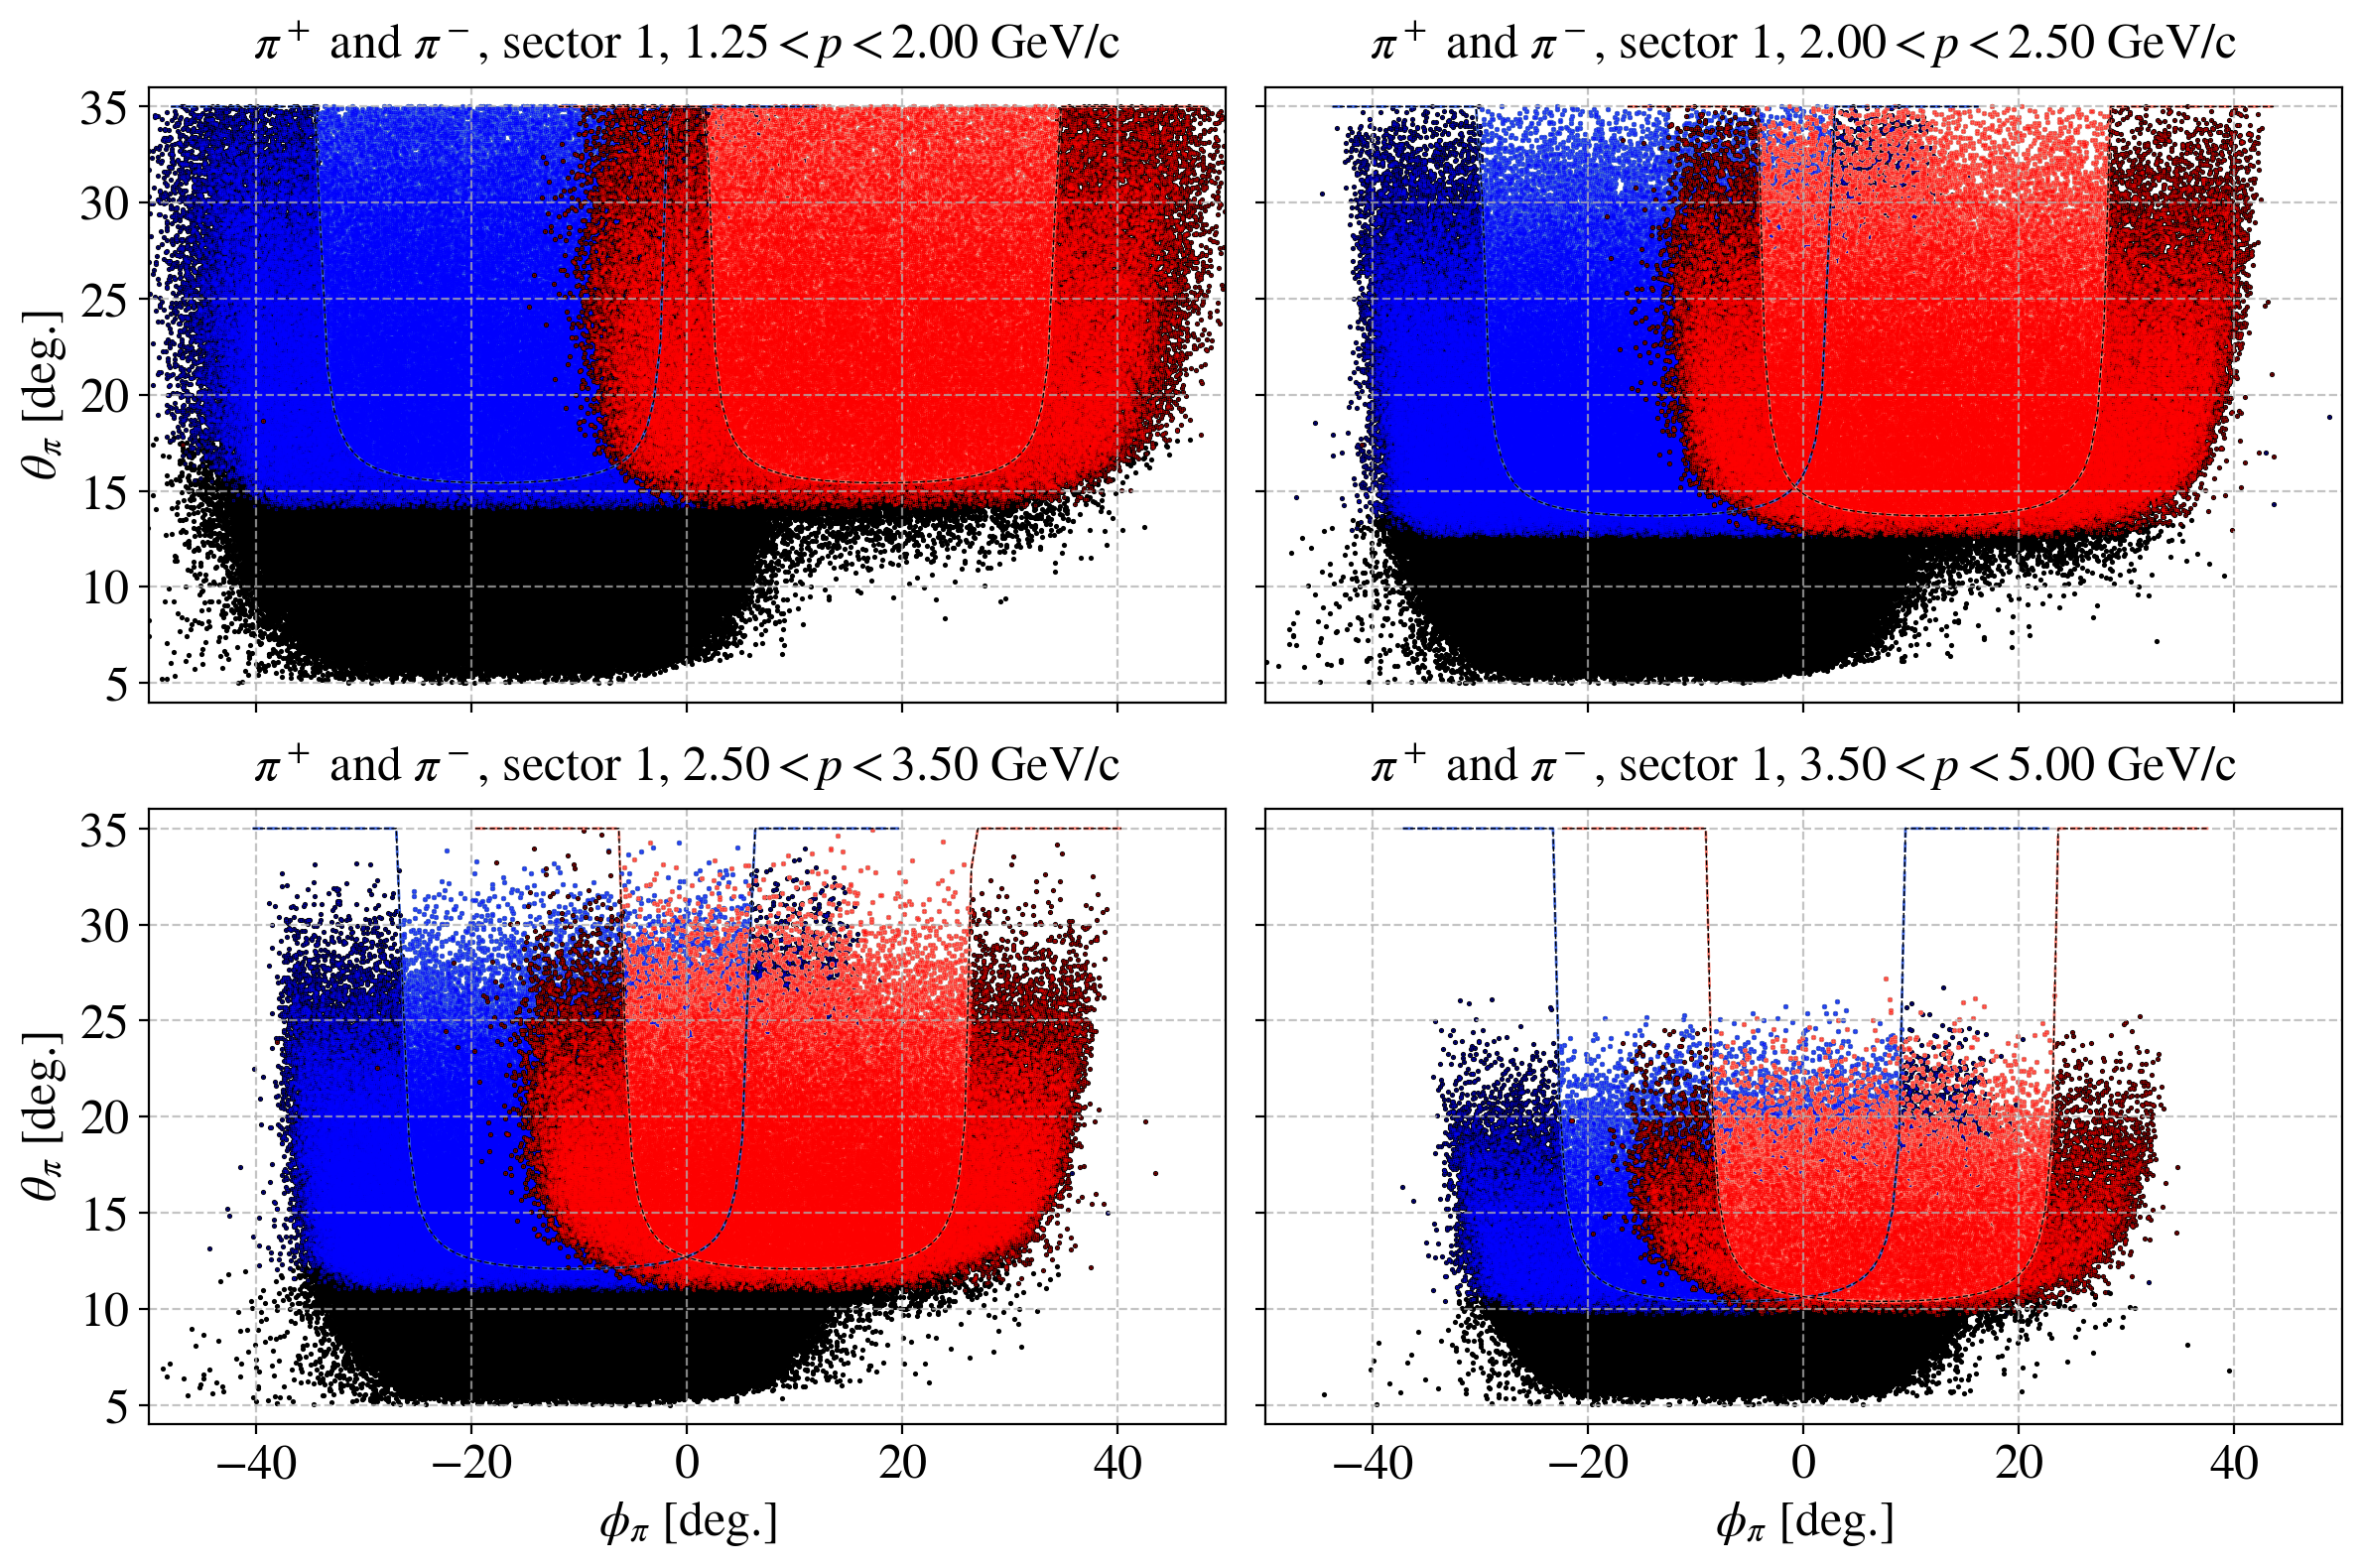

In [22]:
for sector in [sectors[0]]:
    fig = plt.figure(figsize=(12,8),tight_layout=True)
    
    phi_lims = (phi_min_arr[sector],phi_max_arr[sector])
    phi_mid, theta_min  = dict(), dict()
    phi_fit, pi_bowl    = dict(), dict()
    
    
    for p_min,p_max,p_idx in zip(p_min_arr,p_max_arr,range(Np)):
        ax = fig.add_subplot(2, 2, p_idx + 1 )
        set_axes(ax,
                 '$\phi_\pi$ [deg.]' if p_idx>=Np-2 else '',
                 '$\\theta_\pi$ [deg.]' if p_idx%2==0 else '',
                 remove_ticks_x=False if p_idx>=Np-2 else True,
                 xlim=(np.min(phi_lims),np.max(phi_lims)),ylim=(np.min(theta_bins),np.max(theta_bins)),
                 remove_ticks_y=True if p_idx%2==1 else False ,                 
                 title="$\pi^+$ and $\pi^-$, sector %d, $%.2f < p < %.2f$ GeV/c"%(sector,p_min,p_max),                 
                 fontsize=18,do_add_grid=True)
        

        for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):
            df = Events[pi_ch]
            df_in_sector = df[df.pi_DC_sector==sector]

            df_in_bin = df_in_sector[ (p_min < df_in_sector.pi_P) & (df_in_sector.pi_P < p_max) ]
            theta     = df_in_bin.pi_Theta*180./np.pi            
            phi       = df_in_bin.pi_Phi  *180./np.pi; 
            if sector==4: phi = shift_phi_for_sector_4(phi) 
            
            ax.scatter( phi, theta,s=3 ,marker='.', color=pi_color, edgecolor='k', label="$"+pi_label+"$")

            # define minimal theta as the 5% percentile
            theta_min[pi_ch] = np.percentile(theta,5)
            # define median value of the phi in this sector 
            phi_mid[pi_ch] = np.median(phi[(phi_min_arr[sector]<phi) & (phi<phi_max_arr[sector])])
            # for the bowl drawing, define x-values
            phi_fit[pi_ch] = np.linspace( phi_mid[pi_ch]-30, phi_mid[pi_ch]+30, 100 )
            
            pi_bowl[pi_ch] = get_bowl_function_in_sector(sector=sector, p_idx=p_idx, phi=phi_fit[pi_ch], pi_charge=pi_ch )
            plt.plot( phi_fit[pi_ch], pi_bowl[pi_ch] , '--',color=pi_color, linewidth=1)
            plt.plot( phi_fit[pi_ch], pi_bowl[pi_ch] , '--',color='k', linewidth=0.5)
        
            # Define which of the events pass the cuts
            theta_min_in_sector = get_theta_min_in_phi_theta_bowl( pi_charge=pi_ch, sector=sector, p_idx=p_idx, phi=phi )
            df_in_sector_pass_cut = df_in_bin[ df_in_bin.pi_Theta*r2d > theta_min_in_sector ]
            theta     = df_in_sector_pass_cut.pi_Theta*180./np.pi            
            phi       = df_in_sector_pass_cut.pi_Phi  *180./np.pi; 
            if sector==4: phi = shift_phi_for_sector_4(phi) 
            ax.scatter( phi, theta, s=3 ,marker='.', color=pi_color)
            
            # Super-impose events that passed 2D acceptance matching ct
            df = EventsWithAccMatch2D[pi_ch]
            df_in_sector = df[df.pi_DC_sector==sector]
            df_in_bin = df_in_sector[ (p_min < df_in_sector.pi_P) & (df_in_sector.pi_P < p_max) ]
            theta     = df_in_bin.pi_Theta*180./np.pi            
            phi       = df_in_bin.pi_Phi  *180./np.pi; 
            if sector==4: phi = shift_phi_for_sector_4(phi) 
            ax.scatter( phi, theta, s=0.1 ,marker='.', color='blue' if pi_idx==1 else 'red')


            
        # print('%.2f,%.2f'%(theta_min['piplus'],theta_min['piminus']));
        # print('%.2f,%.2f'%(phi_mid['piplus'],phi_mid['piminus']));
    # save_figure(filename = figures_path + 'theta_vs_phi_p_bins_sector_%d_matched'%sector + '.png')

### (2.3.2) 2D histogram

In [23]:
p_min_arr = np.array([1.25, 2.00, 2.50, 3.50 ])
p_max_arr = np.array([2.00, 2.50, 3.50, 5.00 ])
p_mid_arr = (p_min_arr + p_max_arr)/2

sector 1 , 1.25 <p< 2.0 | R(π+/π-): 1.43 -> 1.42 r: 0.55 -> 0.55
sector 1 , 2.0 <p< 2.5 | R(π+/π-): 1.62 -> 1.49 r: 0.43 -> 0.51
sector 1 , 2.5 <p< 3.5 | R(π+/π-): 1.81 -> 1.57 r: 0.35 -> 0.46
sector 1 , 3.5 <p< 5.0 | R(π+/π-): 2.08 -> 1.70 r: 0.26 -> 0.40
saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/EventSelection/theta_vs_phi_p_bins_sector_1_matched_separate_charges.png


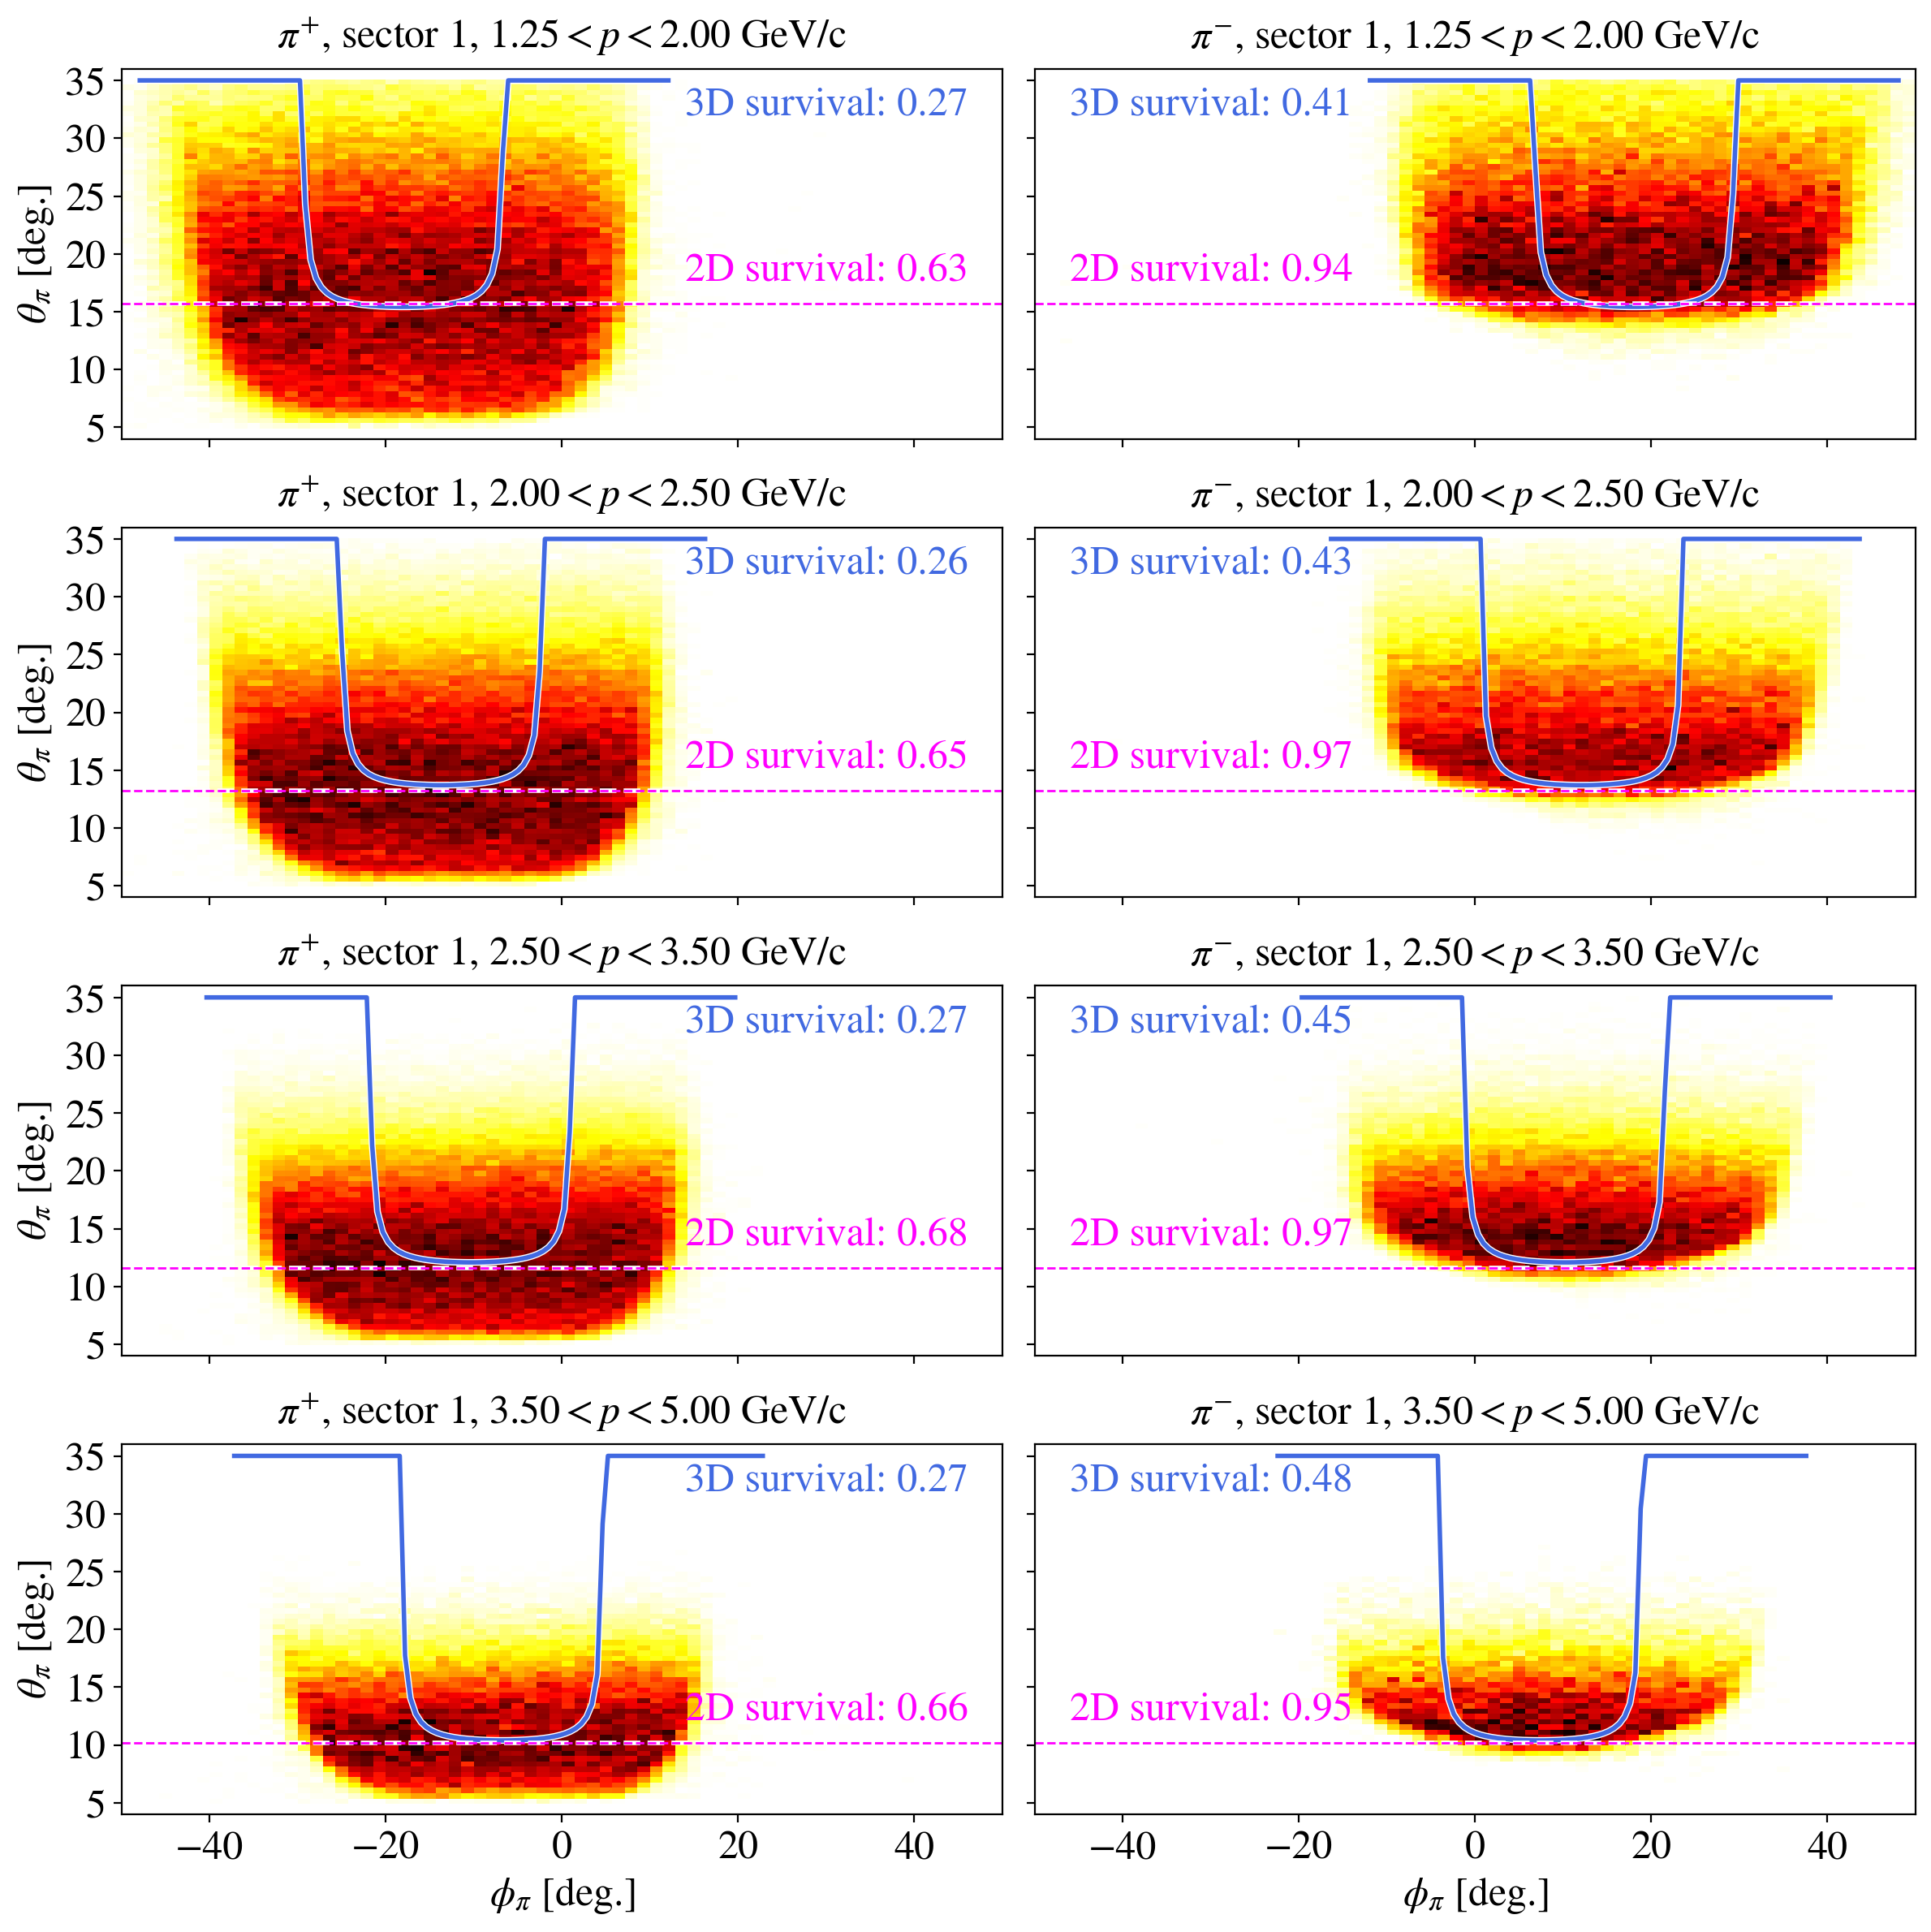

In [26]:
theta_bins = np.linspace(4,36,Nbins)

for sector in [sectors[0]]:
    fig = plt.figure(figsize=(12,12),tight_layout=True)
    
    phi_lims = (phi_min_arr[sector],phi_max_arr[sector])
    phi_mid  = dict()
    phi_fit, pi_bowl    = dict(), dict()
    phi_bins = np.linspace(phi_min_arr[sector],phi_max_arr[sector],Nbins)
    
    Npass2Dcut,Npass3Dcut = dict(),dict()
    for p_min,p_max,p_idx in zip(p_min_arr,p_max_arr,range(Np)):
        
        
        for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):
            ax = fig.add_subplot(4, 2, 2*p_idx + pi_idx )
            set_axes(ax,
                     '$\phi_\pi$ [deg.]' if p_idx>=3 else '',
                     '$\\theta_\pi$ [deg.]' if pi_idx==1 else '',
                     remove_ticks_x=False if p_idx>=3 else True,
                     remove_ticks_y=False if pi_idx==1 else True ,
                     xlim=phi_lims,ylim=(np.min(theta_bins),np.max(theta_bins)),
                     title="$"+pi_label+"$, sector %d, $%.2f < p < %.2f$ GeV/c"%(sector,p_min,p_max),                 
                     fontsize=18,do_add_grid=False)

            df = Events[pi_ch]
            df_in_sector = df[df.pi_DC_sector==sector]
            df_in_bin = df_in_sector[ (p_min < df_in_sector.pi_P) & (df_in_sector.pi_P < p_max) ]
            theta     = df_in_bin.pi_Theta*180./np.pi            
            phi       = df_in_bin.pi_Phi  *180./np.pi; 
            if sector==4: phi = shift_phi_for_sector_4(phi) 
            
            ax.hist2d( phi, theta, bins=(phi_bins,theta_bins) , cmap='hot_r')

            # define median value of the phi in this sector 
            phi_mid[pi_ch] = np.median(phi[(phi_min_arr[sector]<phi) & (phi<phi_max_arr[sector])])
            # for the bowl drawing, define x-values
            phi_fit[pi_ch] = np.linspace( phi_mid[pi_ch]-30, phi_mid[pi_ch]+30, 100 )
            
            pi_bowl[pi_ch] = get_bowl_function_in_sector(sector=sector, p_idx=p_idx, phi=phi_fit[pi_ch], pi_charge=pi_ch )
            plt.plot( phi_fit[pi_ch], pi_bowl[pi_ch] , '-',color='white', linewidth=3)
            plt.plot( phi_fit[pi_ch], pi_bowl[pi_ch] , '-',color='royalblue', linewidth=2)
            
            theta_min_2D = pi_min_theta_cut( pi_charge='any', sector=sector, p=np.array([p_mid_arr[p_idx]]) )
            plt.plot( phi_lims, [theta_min_2D, theta_min_2D] , '--',color='white', linewidth=2)
            plt.plot( phi_lims, [theta_min_2D, theta_min_2D] , '--',color='magenta', linewidth=1)

            
            # Count how many events are above theta_min, and how many pass the 'bowl' cut
            Nall = len(phi)            
            Npass2Dcut[pi_ch+'%.2f<p<%.2f'%(p_min,p_max)] = len(theta[theta > theta_min_2D[0]])
            # Define which of the events pass the cuts
            theta_min_in_sector = get_theta_min_in_phi_theta_bowl( pi_charge=pi_ch, sector=sector, p_idx=p_idx, phi=phi )
            df_in_sector_pass_cut = df_in_bin[ df_in_bin.pi_Theta*r2d > theta_min_in_sector ]
            Npass3Dcut[pi_ch+'%.2f<p<%.2f'%(p_min,p_max)] = len(df_in_sector_pass_cut)
            if pi_idx==1: xtext = phi_max_arr[sector] - 36
            if pi_idx==2: xtext = phi_min_arr[sector] + 4
            plt.text(xtext, theta_min_2D[0]+2, '2D survival: %.2f'%(Npass2Dcut[pi_ch+'%.2f<p<%.2f'%(p_min,p_max)]/Nall), color='magenta', fontsize=18)
            plt.text(xtext, 32, '3D survival: %.2f'%(Npass3Dcut[pi_ch+'%.2f<p<%.2f'%(p_min,p_max)]/Nall), color='royalblue', fontsize=18)
            
            # Super-impose events that passed 2D acceptance matching ct
            df = EventsWithAccMatch2D[pi_ch]
            df_in_sector = df[df.pi_DC_sector==sector]
            df_in_bin = df_in_sector[ (p_min < df_in_sector.pi_P) & (df_in_sector.pi_P < p_max) ]
            theta     = df_in_bin.pi_Theta*180./np.pi            
            phi       = df_in_bin.pi_Phi  *180./np.pi; 
            if sector==4: phi = shift_phi_for_sector_4(phi) 
            # ax.scatter( phi, theta, s=0.1 ,marker='.', color=pi_color)
            # ax.hist2d( phi, theta, bins=(phi_bins,theta_bins) , cmap='hot_r')

    for p_min,p_max,p_idx in zip(p_min_arr,p_max_arr,range(Np)):            
        R2D = Npass2Dcut['piplus'+'%.2f<p<%.2f'%(p_min,p_max)]/Npass2Dcut['piminus'+'%.2f<p<%.2f'%(p_min,p_max)]
        r2D,_,_  = get_r_from_CrossSectionRatio(R2D, 0, 0, u_over_d=1)
        
        R3D = Npass3Dcut['piplus'+'%.2f<p<%.2f'%(p_min,p_max)]/Npass3Dcut['piminus'+'%.2f<p<%.2f'%(p_min,p_max)]
        r3D,_,_  = get_r_from_CrossSectionRatio(R3D, 0, 0, u_over_d=1)
        
        print( 'sector', sector, ',', p_min, '<p<', p_max,'|' ,            
              'R(π+/π-): %.2f -> %.2f'%(R2D,R3D),
              'r: %.2f -> %.2f'%(r2D,r3D))
            
    save_figure(filename = figures_path + 'theta_vs_phi_p_bins_sector_%d_matched_separate_charges'%sector + '.png')

# (3) Now apply the cut to all the data-set together, without interactive plots

In [ ]:
def apply_acceptance_match_cut_p_theta_phi(df_dict_before_cut, fdebug=0):
    '''
    df_dict_after_cut = apply_acceptance_match_cut_p_theta_phi(df_dict_before_cut, fdebug=0)
    '''
    Nbefore_dict, Nafter_dict = dict(),dict()
    df_dict_after_cut = dict()
    for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):
        df = df_dict_before_cut[pi_ch]
        df_after_cut = pd.DataFrame();
        Nbefore_dict[pi_ch], Nafter_dict[pi_ch] = [],[]
        for sector in sectors:#{
            df_in_sector = df[df.pi_DC_sector==sector]
            Nbefore_dict[pi_ch].append(len(df_in_sector))
            df_in_sector_pass_cut = pd.DataFrame();
            for p_min,p_max,p_idx in zip(p_min_arr,p_max_arr,range(Np)):#{
                
                df_in_bin = df_in_sector[ (p_min < df_in_sector.pi_P) & (df_in_sector.pi_P < p_max) ]

                phi       = df_in_bin.pi_Phi  *180./np.pi; 
                if sector==4: phi = shift_phi_for_sector_4(phi)             
                theta_min_in_sector = get_theta_min_in_phi_theta_bowl( pi_charge=pi_ch, sector=sector, p_idx=p_idx, phi=phi )

                df_in_sector_in_bin_pass_cut = df_in_bin[ df_in_bin.pi_Theta*r2d > theta_min_in_sector ]                
                df_in_sector_pass_cut = pd.concat([df_in_sector_pass_cut,df_in_sector_in_bin_pass_cut])
            #}            
            Nafter_dict[pi_ch].append(len(df_in_sector_pass_cut))
            df_after_cut = pd.concat([df_after_cut, df_in_sector_pass_cut]);
            #}
        df_dict_after_cut[pi_ch] = df_after_cut
        #}
    #}

    if fdebug:#{
        print('Acceptance matching cut statistics');
        print('Sector \t Before \t After \t Survival');
        print('------------------------------------------------')
        for pi_ch,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_labels,pi_colors,[1,2]):#{
            print('\t\t',pi_ch)
            print('------------------------------------------------')
            Nbefore_dict[pi_ch+' total'] = np.sum(Nbefore_dict[pi_ch])
            Nafter_dict[pi_ch+' total']  = np.sum(Nafter_dict[pi_ch])

            for sector in sectors: 
                print(sector,'\t %.2f M'%(Nbefore_dict[pi_ch][sector-1]*1e-6),'\t','%.2f M'%(Nafter_dict[pi_ch][sector-1]*1e-6),'\t %.1f'%(100.*Nafter_dict[pi_ch][sector-1]/Nbefore_dict[pi_ch][sector-1]),'%' )
            print('------------------------------------------------')
            print('\t %.2f M'%(Nbefore_dict[pi_ch+' total']*1e-6),'\t','%.2f M'%(Nafter_dict[pi_ch+' total']*1e-6),'\t %.1f'%(100.*Nafter_dict[pi_ch+' total']/Nbefore_dict[pi_ch+' total']),'%' )
            print()
        #}
    #}
    return df_dict_after_cut

In [ ]:
apply_acceptance_match_cut_p_theta_phi( df_dict_before_cut=e_e_pi, fdebug=2 );
# IT WORKS - MOVE THIS TO ANALYSIS FRAME AND PLOT CROSS-SECTION RATIO